In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mno
plt.rcParams["figure.figsize"] = (26,18)  # make the matplotlib figures larger

In [2]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


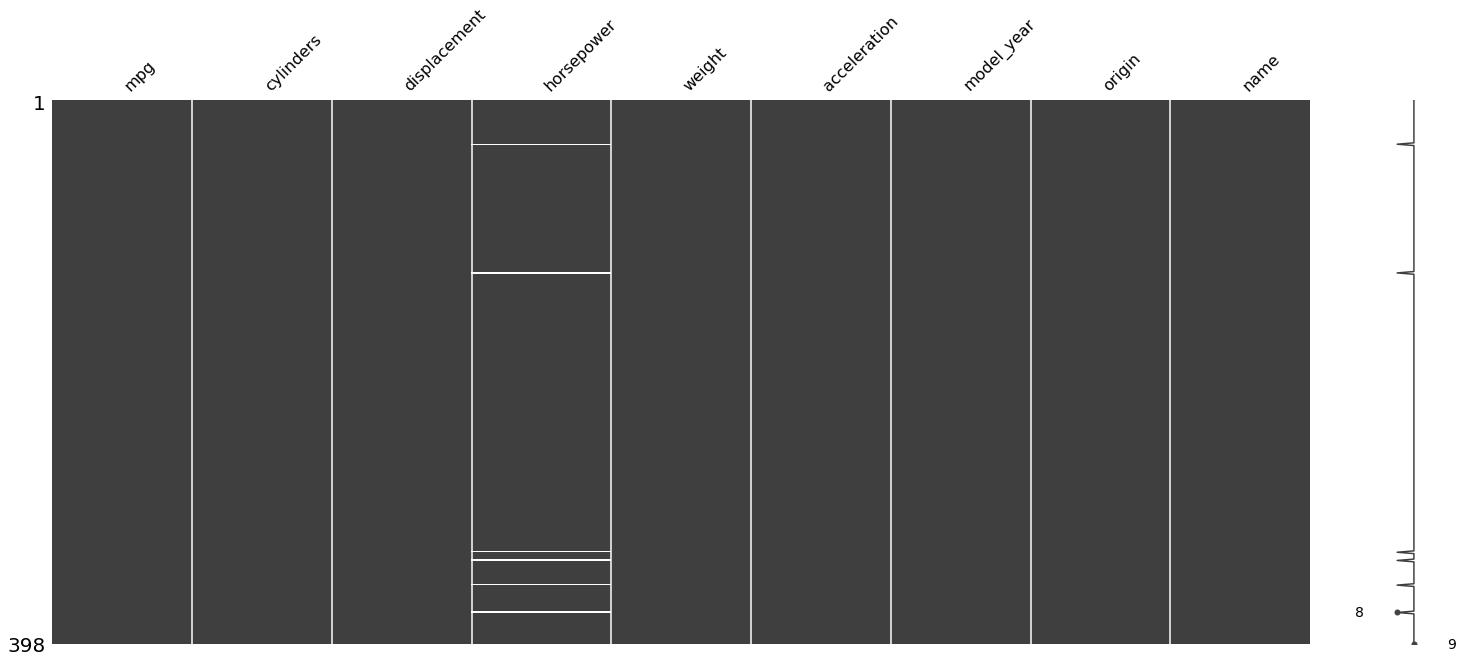

In [3]:
mno.matrix(df)

In [4]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

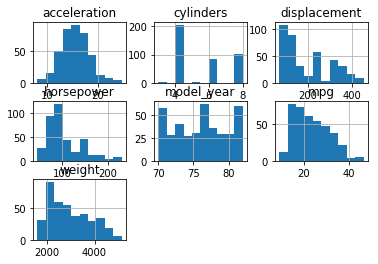

In [5]:
df.iloc[:,:-2].hist();plt.show()

# Imputation with scikit-learn

In [6]:
from sklearn.impute import SimpleImputer

df_imp = df.copy()
imp = SimpleImputer()
df_imp.iloc[:,:-2] = imp.fit_transform(df_imp.iloc[:,:-2])
df_imp.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,usa,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,usa,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,usa,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,usa,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,usa,ford torino


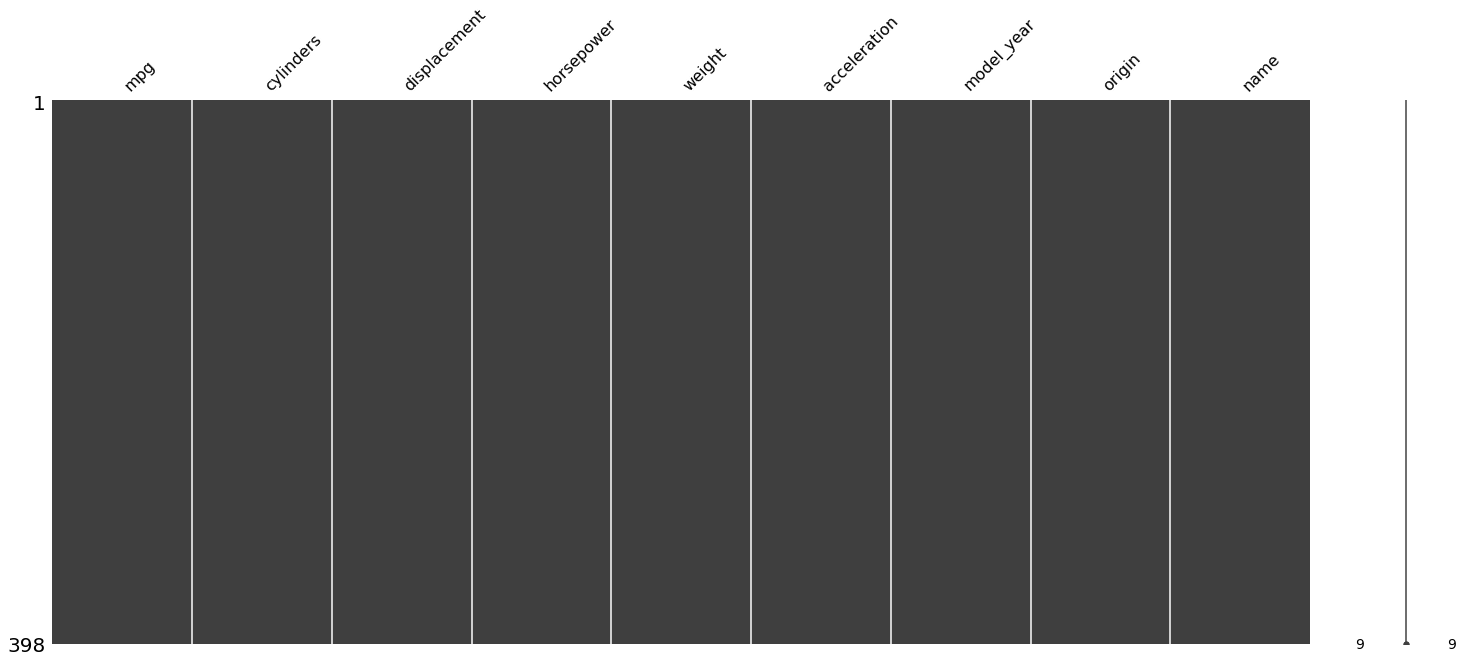

In [8]:
mno.matrix(df_imp)

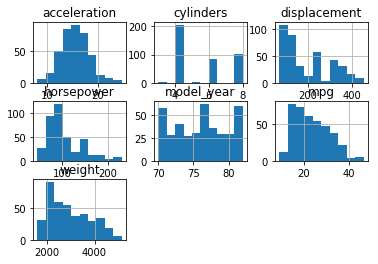

In [9]:
df_imp.iloc[:,:-2].hist();plt.show()

In [9]:
df_imp.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.47,2970.42,15.57,76.01
std,7.82,1.70,104.27,38.20,846.84,2.76,3.70
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00
25%,17.50,4.00,104.25,76.00,2223.75,13.82,73.00
50%,23.00,4.00,148.50,95.00,2803.50,15.50,76.00
75%,29.00,8.00,262.00,125.00,3608.00,17.17,79.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00


# Min-Max Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

df_n1 = df_imp.copy()

scaler = MinMaxScaler()
df_n1.iloc[:,:-2] = scaler.fit_transform(df_n1.iloc[:,:-2])
df_n1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,usa,chevrolet chevelle malibu
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,usa,buick skylark 320
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,usa,plymouth satellite
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,usa,amc rebel sst
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,usa,ford torino


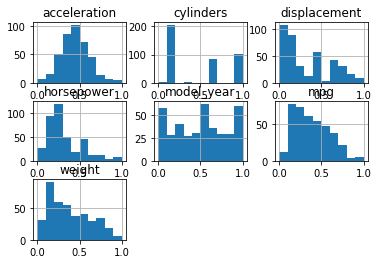

In [11]:
df_n1.iloc[:,:-2].hist();plt.show()

In [12]:
df_n1.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,0.39,0.49,0.32,0.32,0.38,0.45,0.50
std,0.21,0.34,0.27,0.21,0.24,0.16,0.31
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.23,0.20,0.09,0.16,0.17,0.35,0.25
50%,0.37,0.20,0.21,0.27,0.34,0.45,0.50
75%,0.53,1.00,0.50,0.43,0.57,0.55,0.75
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Standard Scaler

In [18]:
from sklearn.preprocessing import StandardScaler

df_n2 = df_imp.copy()

scaler = StandardScaler()
df_n2.iloc[:,:-2] = scaler.fit_transform(df_n2.iloc[:,:-2])
df_n2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,-0.706439,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,usa,chevrolet chevelle malibu
1,-1.090751,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,usa,buick skylark 320
2,-0.706439,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,usa,plymouth satellite
3,-0.962647,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,usa,amc rebel sst
4,-0.834543,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,usa,ford torino


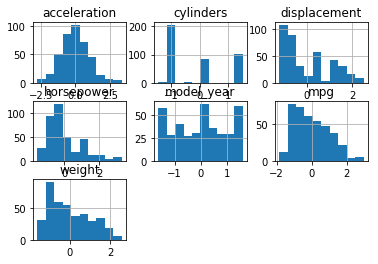

In [19]:
df_n2.iloc[:,:-2].hist();plt.show()

In [20]:
df_n2.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.86,-1.44,-1.20,-1.53,-1.60,-2.75,-1.63
25%,-0.77,-0.86,-0.86,-0.75,-0.88,-0.63,-0.82
50%,-0.07,-0.86,-0.43,-0.25,-0.20,-0.02,-0.00
75%,0.70,1.50,0.66,0.54,0.75,0.58,0.81
max,2.96,1.50,2.51,3.29,2.57,3.35,1.62


# Transformation to other distributions

## Mapping to a Uniform distribution

In [16]:
from sklearn.preprocessing import QuantileTransformer

df_t1 = df_imp.copy()

qt = QuantileTransformer()
df_t1.iloc[:, :-2] = qt.fit_transform(df_t1.iloc[:,:-2])
df_t1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,0.289790,1.0,0.813814,0.765766,0.728152,0.089590,1.000000e-07,usa,chevrolet chevelle malibu
1,0.152653,1.0,0.885385,0.912913,0.775804,0.065065,1.000000e-07,usa,buick skylark 320
2,0.289790,1.0,0.838839,0.859860,0.712846,0.035035,1.000000e-07,usa,plymouth satellite
3,0.201702,1.0,0.790791,0.859860,0.710060,0.089590,1.000000e-07,usa,amc rebel sst
4,0.239239,1.0,0.768268,0.798799,0.720183,0.025189,1.000000e-07,usa,ford torino


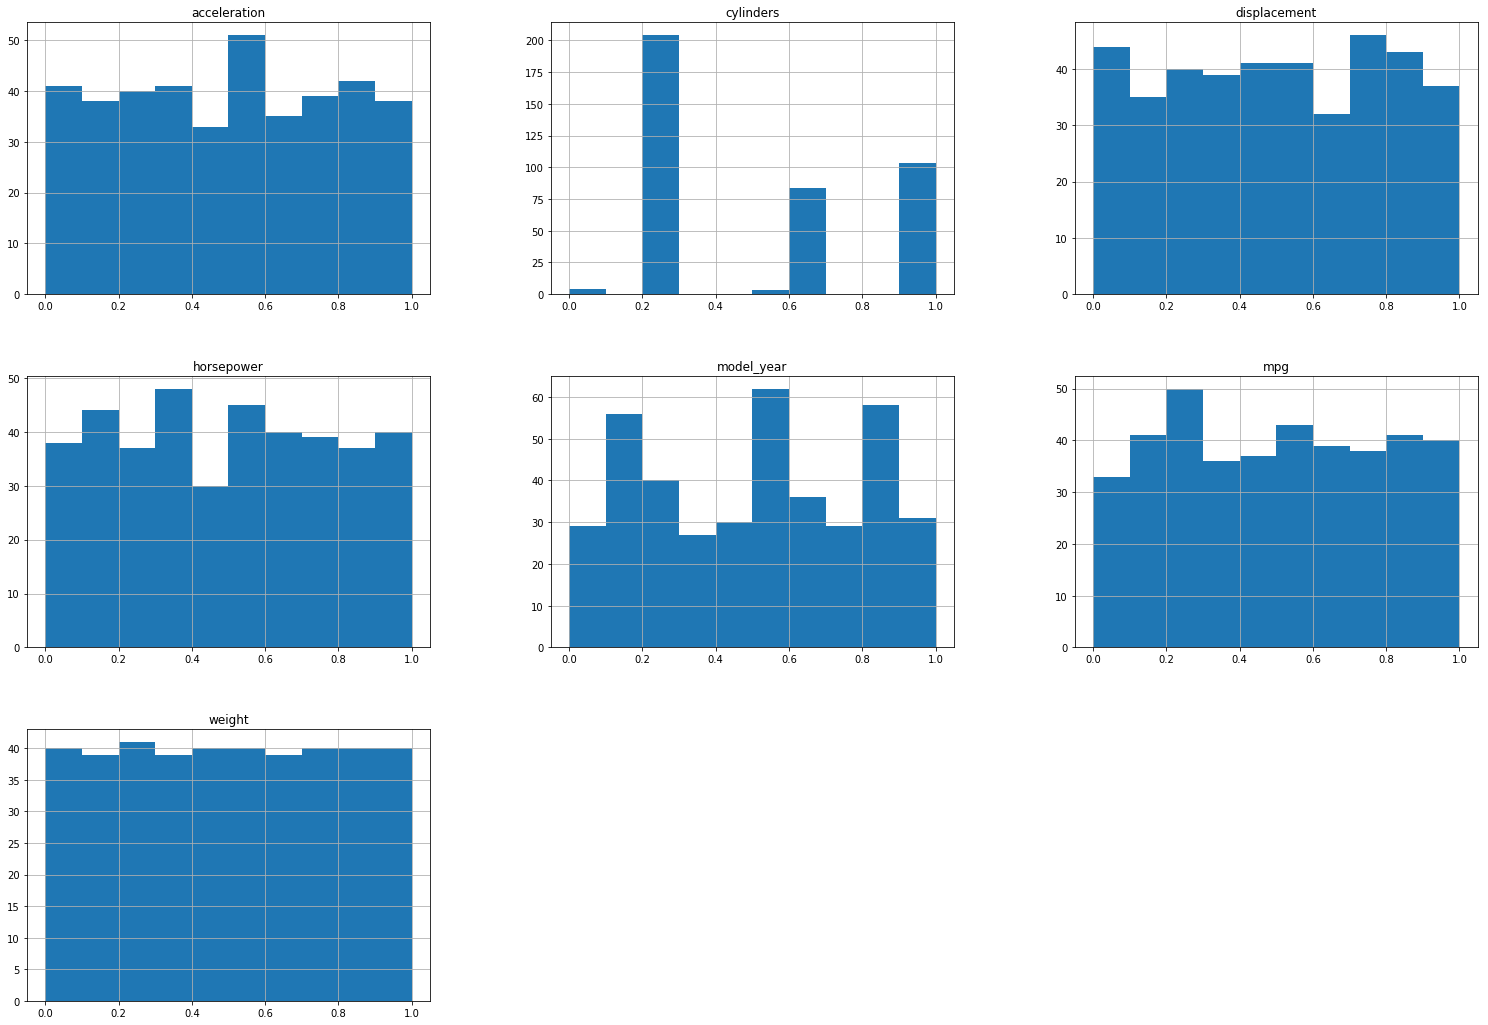

In [25]:
df_t1.iloc[:,:-2].hist()
plt.show()

## Mapping to a Gaussian distribution
### Using the QuantileTransformer

In [26]:
from sklearn.preprocessing import QuantileTransformer

df_t2 = df_imp.copy()

qt = QuantileTransformer(output_distribution='normal')
df_t2.iloc[:, :-2] = qt.fit_transform(df_t2.iloc[:,:-2])
df_t2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,-0.553999,5.199338,0.892038,0.724973,0.607233,-1.343287,-5.199338,usa,chevrolet chevelle malibu
1,-1.025123,5.199338,1.202347,1.358913,0.758100,-1.513589,-5.199338,usa,buick skylark 320
2,-0.553999,5.199338,0.989697,1.079690,0.561719,-1.811457,-5.199338,usa,plymouth satellite
3,-0.835558,5.199338,0.809168,1.079690,0.553559,-1.343287,-5.199338,usa,amc rebel sst
4,-0.708752,5.199338,0.733156,0.837338,0.583384,-1.956742,-5.199338,usa,ford torino


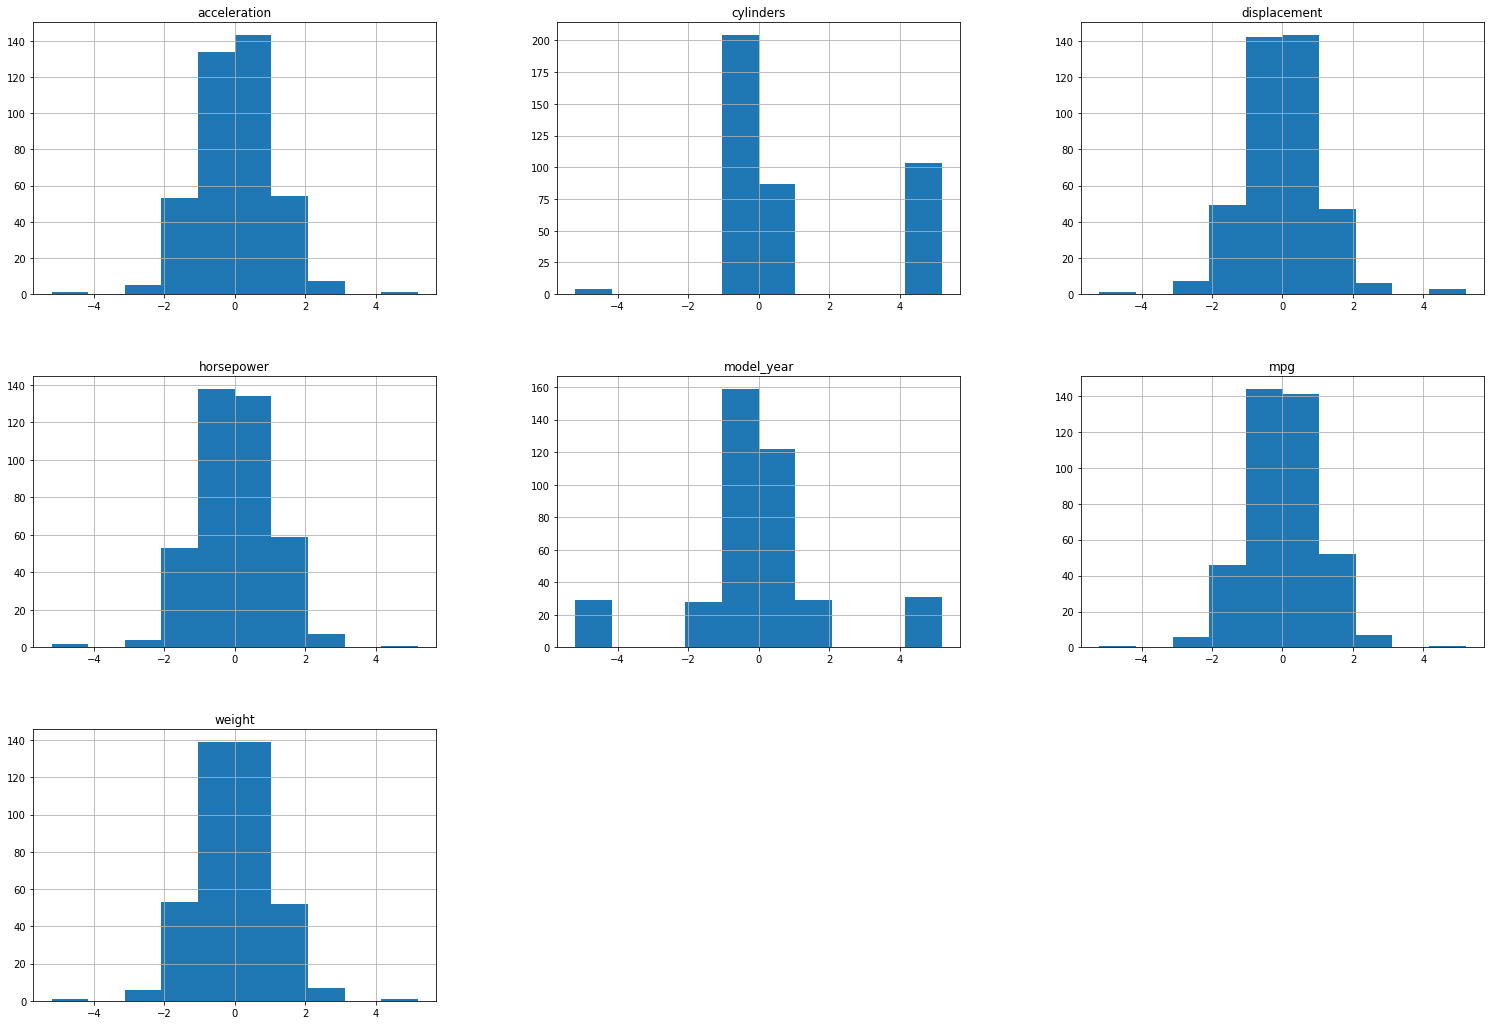

In [27]:
df_t2.iloc[:,:-2].hist()
plt.show()

In [28]:
df_t2.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,0.00,1.05,0.01,-0.01,-0.00,0.00,0.02
std,1.05,2.53,1.10,1.07,1.05,1.05,2.13
min,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20
25%,-0.66,-0.63,-0.67,-0.66,-0.67,-0.68,-0.63
50%,0.02,-0.63,0.01,0.03,-0.00,0.03,0.00
75%,0.66,5.20,0.67,0.68,0.67,0.68,0.65
max,5.20,5.20,5.20,5.20,5.20,5.20,5.20


In [29]:
# by the way: you can always inverse the transformation, e.g. for new data
qt.inverse_transform(df_t2.iloc[:,:-2])

array([[  18. ,    8. ,  307. , ..., 3504. ,   12. ,   70. ],
       [  15. ,    8. ,  350. , ..., 3693. ,   11.5,   70. ],
       [  18. ,    8. ,  318. , ..., 3436. ,   11. ,   70. ],
       ...,
       [  32. ,    4. ,  135. , ..., 2295. ,   11.6,   82. ],
       [  28. ,    4. ,  120. , ..., 2625. ,   18.6,   82. ],
       [  31. ,    4. ,  119. , ..., 2720. ,   19.4,   82. ]])

In [30]:
df_imp.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,usa,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,usa,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,usa,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,usa,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,usa,ford torino


### Alternative: using the PowerTransformer

In [61]:
from sklearn.preprocessing import PowerTransformer

df_t3 = df_imp.copy()

pt = PowerTransformer()
df_t3.iloc[:, :-2] = pt.fit_transform(df_t3.iloc[:,:-2])
df_t3.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,-0.645513,1.437509,1.137909,0.817877,0.730485,-1.327271,-1.643283,usa,chevrolet chevelle malibu
1,-1.152166,1.437509,1.385691,1.520411,0.917911,-1.531864,-1.643283,usa,buick skylark 320
2,-0.645513,1.437509,1.204442,1.239422,0.660568,-1.740270,-1.643283,usa,plymouth satellite
3,-0.975080,1.437509,1.119350,1.239422,0.657452,-1.327271,-1.643283,usa,amc rebel sst
4,-0.806477,1.437509,1.106877,1.036130,0.674041,-1.952725,-1.643283,usa,ford torino


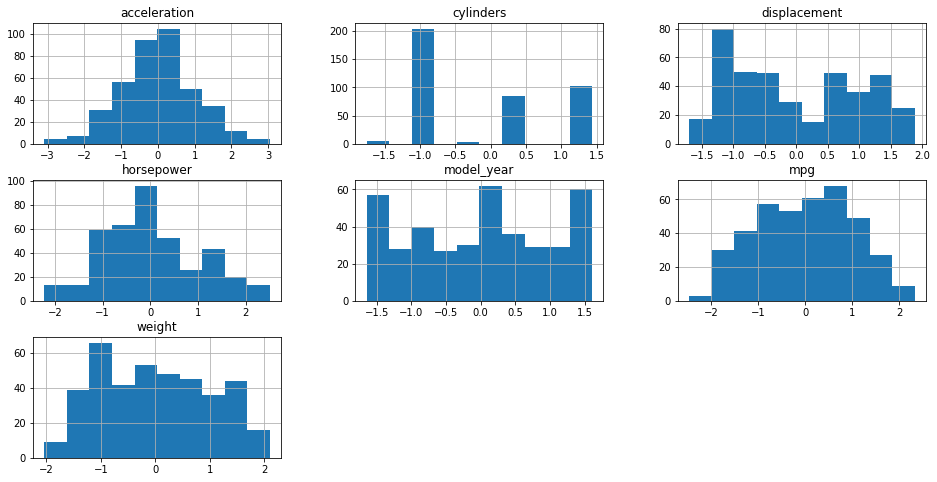

In [62]:
df_t3.iloc[:,:-2].hist()
plt.show()

In [63]:
df_t3.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.47,-1.75,-1.70,-2.22,-2.04,-3.09,-1.64
25%,-0.73,-0.87,-0.90,-0.76,-0.89,-0.61,-0.81
50%,0.07,-0.87,-0.23,-0.10,-0.07,0.01,0.01
75%,0.77,1.44,0.84,0.70,0.83,0.61,0.81
max,2.32,1.44,1.88,2.50,2.10,3.04,1.61
